## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score


### Load the dataset

In [2]:
#load and display dataset 
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
#finding categorical and numerical columns in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
list_numerical = list(df.describe())
list_categorical = list(df.describe(include='O'))

print(list_numerical)
print(list_categorical)

['total_bill', 'tip', 'size']
['sex', 'smoker', 'day', 'time']


- There are total of **7 columns and 244 records**
- there are 3 are of numerical data which are **'total_bill', 'tip', 'size'**
- there are 4 columns of categorical data which are **'sex', 'smoker', 'day', 'time'**

### 2. Compute the average bill amount for each day.

In [5]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [6]:
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

- **male** gender is more generous in giving tips with average of **3.08**

### 4. According to the data, were there more customers for dinner or lunch?

In [7]:
df.groupby('time')['size'].count()

time
Dinner    176
Lunch      68
Name: size, dtype: int64

- more customers were obsreved during **dinner**.

### 5. Based on the statistical summary, comment on the variable 'tip'

In [8]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

- there are total of **244** entries for the 'tip' variable
- the average amount of tip given was **2.99 dollars**
- the standard deviation suggests that there is **slight variability** in tips suggesting that some customers must have given larger amounts of tips compared to others
- the minimum amount of tip observed was **1.00 dollar** and max amount was observed as **10.00** US dollars
- the median which is 50% of the tips is approx. **2.9 dollars** 
- since mean is slightly higher than median, meaning the distribution is slightly right skewed
- 25% of tips given were of 2 dollars and 75% of tips given were of 3.5 dollars
- By calculating the interquartile range and comparing it with max tip value, we can conclude that there might be presence of **outliers** in the distribution

### 6. Find the busiest day in terms of the orders?

In [9]:
df.groupby('day')['size'].sum().sort_values()

day
Fri      40
Thur    152
Sun     216
Sat     219
Name: size, dtype: int64

- **Saturday** was observed as busiest day in terms of orders

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [10]:
df['total_bill'].skew()

1.1332130376158205

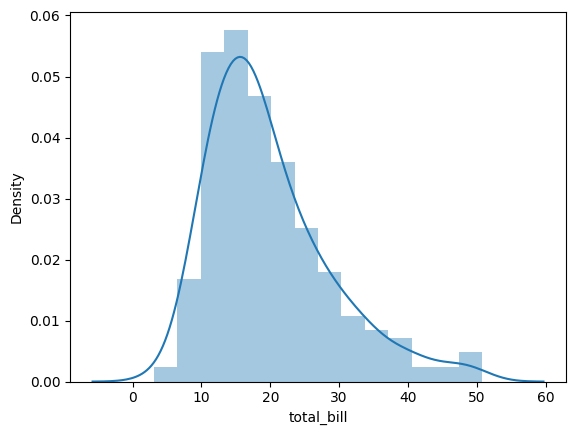

In [11]:
sns.distplot(df['total_bill'])
plt.show()

- from the above observation in the distribution plot, we can see that the "total_bill" column is **positively skewed**.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [12]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


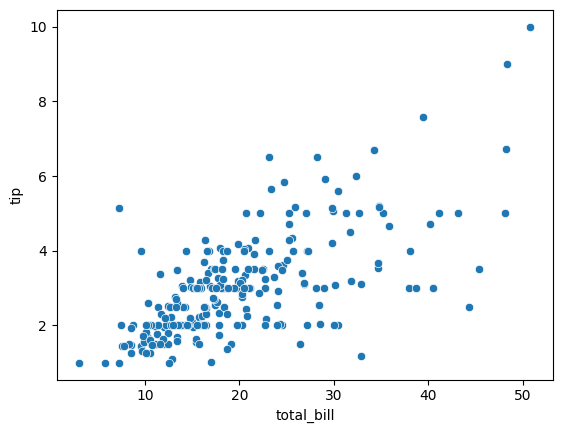

In [13]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.show()

- We can observe a **moderately positive correlation** between 'total bill' and 'tip'. 
- we observe in many cases, as the bill amount increases, the tip also is on higher side. 
- Hence we can conclude that there is a little correlation between 'total bill' and 'tip'.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [14]:
df['sex'].value_counts(normalize=True)*100

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

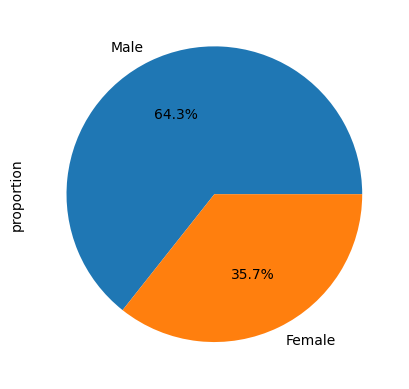

In [15]:
df['sex'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%' )

- The percentage of males is 64.6% and percentage of females is 35.4%

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [16]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

<Axes: xlabel='smoker'>

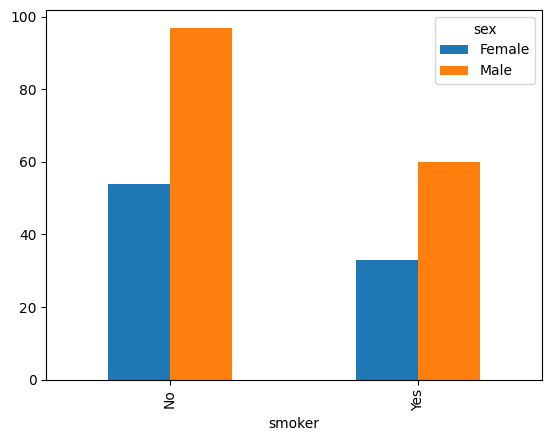

In [17]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')

- we observe that number of non-smokers is more compared to smokers
- we also observe that number of male smokers is higher compared to number of female smokers

### 11. Compute the average tip amount given for different days and display it in the plot.

In [18]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

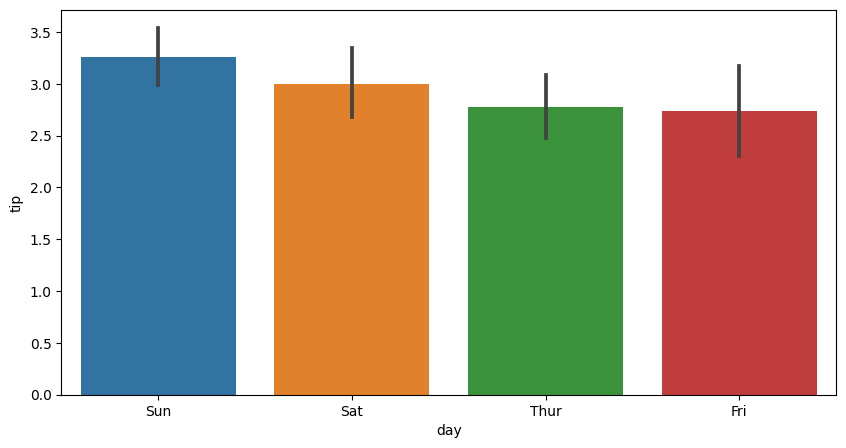

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'day', y='tip', data=df)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [20]:
df.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

Text(0, 0.5, 'Average Total Bill Amount')

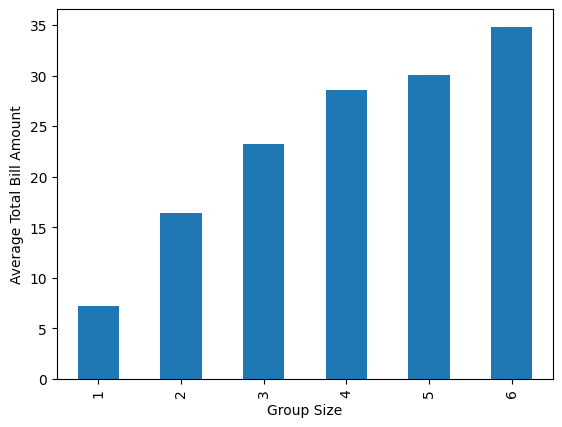

In [21]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.xlabel('Group Size')
plt.ylabel('Average Total Bill Amount')

- from the above plot, we observe that the average bill amount is dependent on the size of the people.
- as the size of people increases, the average bill amount also increases

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

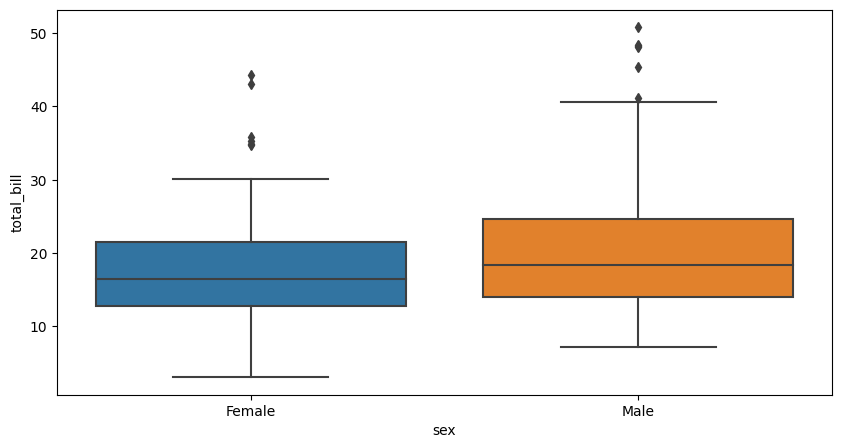

In [22]:
## using the 
plt.figure(figsize=(10,5))
sns.boxplot(x='sex', y='total_bill', data=df)
plt.show()

- the bill amount is comparitively higher in males when compared to females.
- similarly the outliers observed in for males is higher when compared to females


### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [23]:
df.groupby(['time','day'])['total_bill'].max()


time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

In [24]:
#output as series
df[(df['time'].isin(['Lunch', 'Dinner'])) & (df['day'].isin(['Sat', 'Sun']))].groupby(['time','day'])['total_bill'].max()

time    day
Dinner  Sat    50.81
        Sun    48.17
Name: total_bill, dtype: float64

In [25]:
#output as dataframe
df_x = df.groupby(['time','day'], as_index=False)['total_bill'].max()
df_x[ (df_x['day'] == 'Sat') | (df_x['day'] == 'Sun') ]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


- no lunch was observed on saturday and sunday where as the maximum bill amount for dinner on saturday and sunday were 50.81 and 48.17 respectively

### 15. Compute the percentage of missing values in the dataset.

In [26]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

- no missing data was observed in dataset

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [27]:
#finding duplicate records
len(df[df.duplicated()])

1

In [28]:
# drop duplicate records
df.drop_duplicates(inplace=True)

In [29]:
#recheck duplicate records
len(df[df.duplicated()])

0

- **1** duplicated record was observed in the dataset which was dropped sucessfully

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

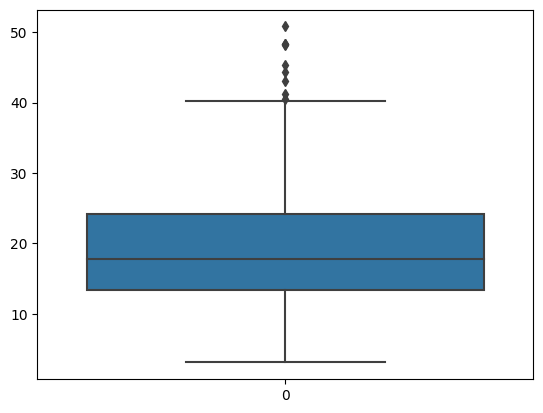

In [30]:
sns.boxplot(df['total_bill'])
plt.show()

- from the above plot, we observe the presence of outliers.

In [31]:
# transforamtion using log approach
df['total_bill_trans'] = np.log(df['total_bill'])

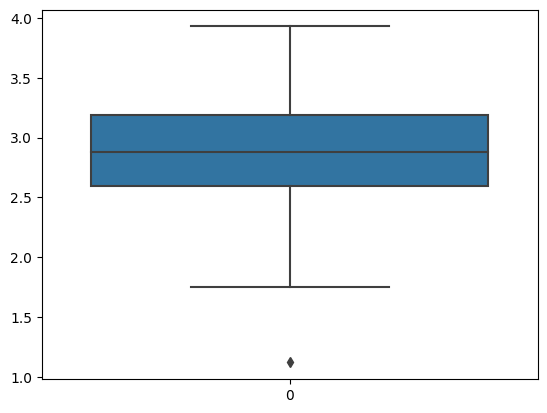

In [32]:
sns.boxplot(df['total_bill_trans'])
plt.show()

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_trans
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340


### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

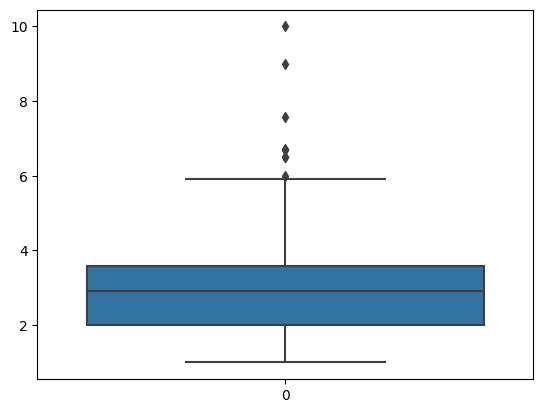

In [34]:
sns.boxplot(df['tip'])
plt.show()

In [35]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)

IQR = Q3-Q1

lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3-(1.5*IQR)

In [36]:
#creating a dataframe df_out with filtered records
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

In [37]:
df_out.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_trans
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.121678
92,5.75,1.00,Female,Yes,Fri,Dinner,2,1.749200
111,7.25,1.00,Female,No,Sat,Dinner,1,1.981001
215,12.90,1.10,Female,Yes,Sat,Dinner,2,2.557227


- outliers were observed in the 'tip' column and were removed using IQR technique

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [38]:
df1 = pd.get_dummies(df, drop_first=True)
df1.head(5)

# get_dummies - works on all the categorical columns in a dataframe and is available in pandas
# one hot encoding - works on selected column and is available in sklearn library

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,False,False,False,True,False,False
1,10.34,1.66,3,2.336020,True,False,False,True,False,False
2,21.01,3.50,3,3.044999,True,False,False,True,False,False
3,23.68,3.31,2,3.164631,True,False,False,True,False,False
4,24.59,3.61,4,3.202340,False,False,False,True,False,False


In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_trans
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [40]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max-tb_min
print(range_)

47.74


In [41]:
#using minmax normalization
mm = MinMaxScaler()

# StandardScaler -- Mean/SD, Mean = 0, SD = 1
# MinMaxScaler -- Min/Max, Range = 1

In [42]:
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [43]:
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print(range_)

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

**i) Encoding categorical variables**

In [44]:
# tips_df = pd.read_csv('tips.csv')
# tips_df.head(2)

tips_df = pd.read_csv('tips.csv')
tips_df = pd.get_dummies(df, drop_first=True)
tips_df.head()

,total_bill,tip,size,total_bill_trans,total_bill_mm,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,0.291579,False,False,False,True,False,False
1,10.34,1.66,3,2.336020,0.152283,True,False,False,True,False,False
2,21.01,3.50,3,3.044999,0.375786,True,False,False,True,False,False
3,23.68,3.31,2,3.164631,0.431713,True,False,False,True,False,False
4,24.59,3.61,4,3.202340,0.450775,False,False,False,True,False,False


**ii) storing the columns in variables**

In [45]:
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(170, 10) (73, 10)
(170,) (73,)


In [47]:
## Scaling the data using min max scaling
mm = MinMaxScaler()

In [48]:
X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
pred = lr.predict(X_test)
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.4369003616514786


### Happy Learning:)